<a href="https://colab.research.google.com/github/ChingizIbnVaxob/data-science-practices/blob/main/07.05.2024/UnderHood1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
import torch

#path
path = untar_data(URLs.MNIST_SAMPLE)
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [2]:
img3_sample = threes[3]
img3 = Image.open(img3_sample)
img3

In [3]:
img7_sample = sevens[999]
img7 = Image.open(img7_sample)
img7

In [4]:
array(img3)[4:10, 4:10] #convert to array

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 178],
       [  0,   0,   0,   0,   0, 186],
       [  0,   0,   0,   0,   0, 186],
       [  0,   0,   0,   0,   0,  39]], dtype=uint8)

In [5]:
tensor(img3)[4:10, 4:10] #convert to tensor

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 178],
        [  0,   0,   0,   0,   0, 186],
        [  0,   0,   0,   0,   0, 186],
        [  0,   0,   0,   0,   0,  39]], dtype=torch.uint8)

In [6]:
import pandas as pd
img3_t = tensor(img3)
df = pd.DataFrame(img3_t[4:22, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,104,253,253,253,255,253,253,253,218,32,0,0
2,0,0,0,0,0,178,248,252,252,252,253,252,252,252,252,215,34,0
3,0,0,0,0,0,186,252,252,252,252,253,252,252,252,252,252,79,0
4,0,0,0,0,0,186,252,243,172,172,39,39,39,219,252,252,79,0
5,0,0,0,0,0,39,53,47,0,0,0,29,117,244,252,252,79,0
6,0,0,0,0,0,0,0,0,0,0,54,208,252,252,252,184,21,0
7,0,0,0,0,0,0,0,0,3,41,253,252,252,252,206,21,0,0
8,0,0,0,0,0,0,5,41,165,252,253,252,252,252,227,131,9,0
9,0,0,0,0,0,109,163,252,252,252,253,252,252,252,252,252,156,0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pixels similarity.

In [8]:
three_tensors = [tensor(Image.open(i)) for i in threes]
seven_tensors = [tensor(Image.open(i)) for i in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

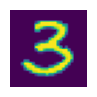

In [9]:
show_image(three_tensors[8])

# Stacking

In [10]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

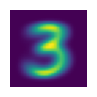

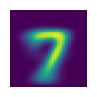

In [11]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

s_3 = show_image(mean3)
s_7 = show_image(mean7)

(<Axes: >, <Axes: >)

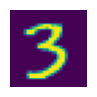

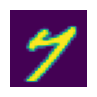

In [18]:
s_3 = stacked_threes[1]
s_7 = stacked_sevens[1]
show_image(s_3), show_image(s_7)

* Mean absolute difference (error) MAE or L1 norm
* Root Mean Squared Error RMSE or L2 norm





In [24]:
# MAE
mae = (s_3-mean3).abs().mean()



#RMSE
rmse = (s_3-mean3).pow(2).mean().sqrt()
mae, rmse

(tensor(0.1114), tensor(0.2021))

In [23]:
# MAE
mae = (s_3-mean7).abs().mean()



#RMSE
rmse = (s_3-mean7).pow(2).mean().sqrt()
mae, rmse

(tensor(0.1586), tensor(0.3021))